In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/School21/d12/data/checking-logs.sqlite')

In [4]:
checker = pd.read_sql('''SELECT * FROM checker''', conn)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [5]:
num_commits = pd.read_sql('''WITH num_commits AS (SELECT uid, strftime("%Y-%m-%d", timestamp) AS timestamp, numTrials FROM checker 
                             WHERE uid LIKE "user_%" AND labname = "project1" AND status = "ready") 
                             SELECT * FROM num_commits''', conn).sort_values(['timestamp', 'uid'])
num_commits

,uid,timestamp,numTrials
0,user_4,2020-04-17,1
1,user_4,2020-04-17,2
2,user_4,2020-04-17,3
3,user_4,2020-04-17,4
4,user_4,2020-04-17,5
...,...,...,...
946,user_19,2020-05-15,26
947,user_19,2020-05-15,27
948,user_19,2020-05-15,28
950,user_19,2020-05-15,29


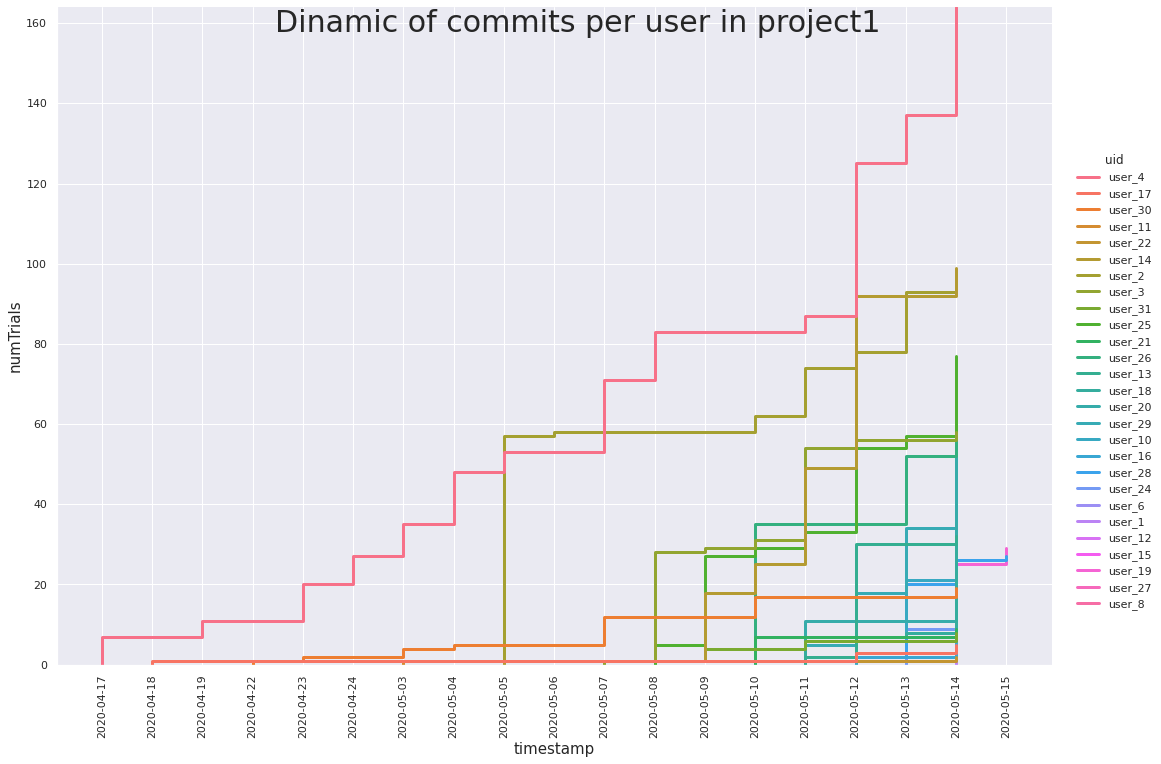

In [6]:
sns.set_theme()

sns.displot(
    data=num_commits,
    kind="ecdf",
    x='timestamp',
    stat='count',
    hue='uid',
    height=10,
    aspect=1.5,
    linewidth=3,
    )

plt.suptitle('Dinamic of commits per user in project1', size=30)
plt.xlabel('timestamp', size=15)
plt.ylabel('numTrials', size=15)
plt.xticks(rotation=90)
plt.show()


In [7]:
conn.close()